# Tutorial-Dealing with spectrum data

Modeling solar cell often involves reading and dealing with different type of spectrum, such as solar spectrum, absorption specturm, etc. To put these spectrum together, one often has to various steps of unit conversion, interpolation and multiplication of spectrum data. This process can be very tedious and error-prone. Pypvcell provides a easy and robust way to deal with spectrum data by using the python class ```Spectrum```. 

In [2]:
%matplotlib inline
import numpy as np
import scipy.constants as sc
import matplotlib.pyplot as plt
from pypvcell.spectrum import Spectrum

/Users/kanhua/Dropbox/Programming/python_distribution_try/pypvcell_p3_lw/lib/python3.5/site-packages/matplotlib/cbook.py:128: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the matplotlib toolkit finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Let's start with a simple example. We setup a generalized planck distribution:

In [3]:
# TODO: add latex equation of Generalized Planck distribution

Text(0,0.5,'emission intensity (abu)')

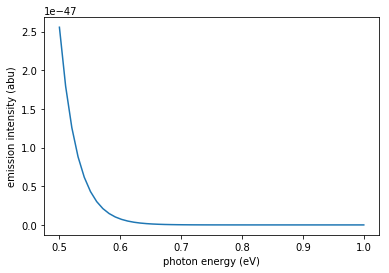

In [4]:
# set up an array of photon energy in eV
pe=np.linspace(0.5,1)

# set up a Planck-like spectrum
pk_spec=np.power(pe*sc.e,2)/np.exp(pe*sc.e/(sc.k*300))

plt.plot(pe,pk_spec)
plt.xlabel("photon energy (eV)")
plt.ylabel("emission intensity (abu)")

### Initialize a Spectrum class
Let's try to do something with it.
First we load these arrays into an instance of ```Spectrum``` class:

In [5]:
planck_sp=Spectrum(x_data=pe,y_data=pk_spec,x_unit='eV')

Note that it is mandatory to assign the unit of ```x_data```, since the program needs to know how to convert the data into different units.
It currently supports many common units such as:
- length: m, cm, um, nm...etc.
- energy: J, eV

### Get the magnitueds of a ```Spectrum``` instance
There are two ways to convert the values of ```Spectrum``` into numpy arrays. One is without interpolation, just get the array that we loaded when the class was initialized. Again, the unit of x_data has to be assigned:

#### Retrieve the values without interpolation

In [6]:
sp_values=planck_sp.get_spectrum(to_x_unit="eV")

Text(0,0.5,'emission intensity (abu)')

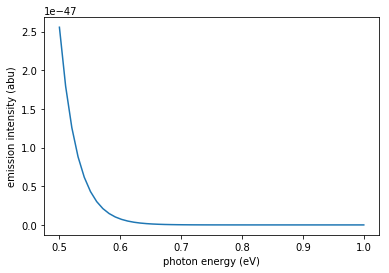

In [7]:
plt.plot(sp_values[0,:],sp_values[1,:])
plt.xlabel("photon energy (eV)")
plt.ylabel("emission intensity (abu)")

Alternatively, we could convert the unit of x_data to nm:

Text(0,0.5,'emission intensity (abu)')

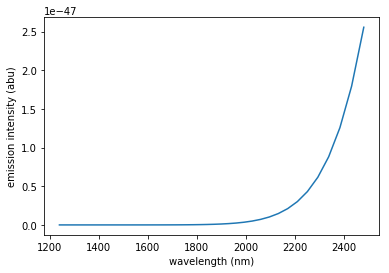

In [8]:
sp_values=planck_sp.get_spectrum(to_x_unit="nm")
plt.plot(sp_values[0,:],sp_values[1,:])
plt.xlabel("wavelength (nm)")
plt.ylabel("emission intensity (abu)")

#### Retrieve the values with interpolation
We can also retrieve the values of the spectrum by assigning the values of x data. The program will try to interpolate the value of y at the point that original x values are missing.

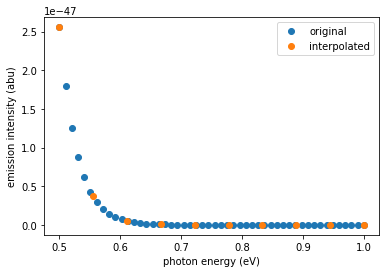

In [9]:
new_x_data=np.linspace(0.5,1,num=10)
sp_values=planck_sp.get_spectrum(to_x_unit='eV')
interped_sp_values=planck_sp.get_interp_spectrum(to_x_data=new_x_data,to_x_unit='eV')

plt.plot(sp_values[0,:],sp_values[1,:],'o',label="original")
plt.plot(interped_sp_values[0,:],interped_sp_values[1,:],'o',label="interpolated")
plt.xlabel("photon energy (eV)")
plt.ylabel("emission intensity (abu)")
plt.legend()

In [10]:
"""
TO DO list:
- The explaination of the key components in Spectrum class
- The main spirit of the design: why assigning x_unit is necessary.
- Conversion of spectral density
- Multiplication of spectrum

"""

'\nTO DO list:\n- The explaination of the key components in Spectrum class\n- The main spirit of the design: why assigning x_unit is necessary.\n- Conversion of spectral density\n- Multiplication of spectrum\n\n'